In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Introduction and preparing your data


### Checking the fraud to non-fraud ratio

In [23]:
df = pd.read_csv("chapter_1/creditcard_sampledata_3.csv", index_col = 0)

# Explore the features available in your dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5050 entries, 258647 to 63421
Data columns (total 30 columns):
V1        5050 non-null float64
V2        5050 non-null float64
V3        5050 non-null float64
V4        5050 non-null float64
V5        5050 non-null float64
V6        5050 non-null float64
V7        5050 non-null float64
V8        5050 non-null float64
V9        5050 non-null float64
V10       5050 non-null float64
V11       5050 non-null float64
V12       5050 non-null float64
V13       5050 non-null float64
V14       5050 non-null float64
V15       5050 non-null float64
V16       5050 non-null float64
V17       5050 non-null float64
V18       5050 non-null float64
V19       5050 non-null float64
V20       5050 non-null float64
V21       5050 non-null float64
V22       5050 non-null float64
V23       5050 non-null float64
V24       5050 non-null float64
V25       5050 non-null float64
V26       5050 non-null float64
V27       5050 non-null float64
V28       5050 non-null

In [24]:
# Count the occurrences of fraud and no fraud and print them
occ = df['Class'].value_counts()
print(occ)

# Print the ratio of fraud cases
print(occ / len(df))

0    5000
1      50
Name: Class, dtype: int64
0    0.990099
1    0.009901
Name: Class, dtype: float64


### Plotting your data

In [ ]:
# Get source code of any function
import inspect
source = inspect.getsource(function)
print(source)

In [25]:
def prep_data(df):
    X = df.iloc[:, 1:29]
    X = np.array(X).astype(np.float)
    y = df.iloc[:, 29]
    y=np.array(y).astype(np.float)
    return X,y

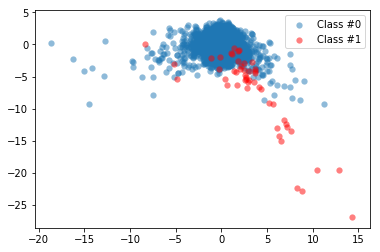

In [28]:
# Define a function to create a scatter plot of our data and labels
def plot_data(X, y):
	plt.scatter(X[y == 0, 0], X[y == 0, 1], label="Class #0", alpha=0.5, linewidth=0.15)
	plt.scatter(X[y == 1, 0], X[y == 1, 1], label="Class #1", alpha=0.5, linewidth=0.15, c='r')
	plt.legend()
	return plt.show()

# Create X and y from the prep_data function 
X, y = prep_data(df)

# Plot our data by running our plot data function on X and y
plot_data(X, y)

### Applying SMOTE

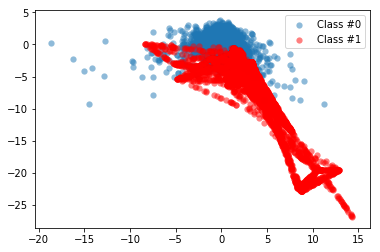

In [31]:
from imblearn.over_sampling import SMOTE

# Define the resampling method
method = SMOTE(kind='regular')

# Create the resampled feature set
X_resampled, y_resampled = method.fit_sample(X,y)

# Plot the resampled data
plot_data(X_resampled, y_resampled)

### Compare SMOTE to original data

In [32]:
def compare_plot(X,y,X_resampled,y_resampled, method):
    # Start a plot figure
    f, (ax1, ax2) = plt.subplots(1, 2)
    # sub-plot number 1, this is our normal data
    c0 = ax1.scatter(X[y == 0, 0], X[y == 0, 1], label="Class #0",alpha=0.5)
    c1 = ax1.scatter(X[y == 1, 0], X[y == 1, 1], label="Class #1",alpha=0.5, c='r')
    ax1.set_title('Original set')
    # sub-plot number 2, this is our oversampled data
    ax2.scatter(X_resampled[y_resampled == 0, 0], X_resampled[y_resampled == 0, 1], label="Class #0", alpha=.5)
    ax2.scatter(X_resampled[y_resampled == 1, 0], X_resampled[y_resampled == 1, 1], label="Class #1", alpha=.5,c='r')
    ax2.set_title(method)
    # some settings and ready to go
    plt.figlegend((c0, c1), ('Class #0', 'Class #1'), loc='lower center',
                  ncol=2, labelspacing=0.)
    #plt.tight_layout(pad=3)
    return plt.show()

0.0    5000
1.0      50
dtype: int64
1.0    5000
0.0    5000
dtype: int64


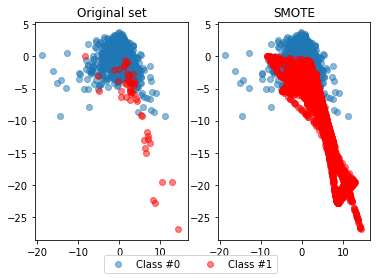

In [33]:
# Print the value_counts on the original labels y
print(pd.value_counts(pd.Series(y)))

# Print the value_counts
print(pd.value_counts(pd.Series(y_resampled)))

# Run compare_plot
compare_plot(X, y, X_resampled, y_resampled, method='SMOTE')

### Exploring the traditional way to catch fraud

In [34]:
# Get the mean for each group
df.groupby('Class').mean()

# Implement a rule for stating which cases are flagged as fraud
df['flag_as_fraud'] = np.where(np.logical_and((df['V1'] < -3), (df['V3']< -5)), 1, 0)

# Create a crosstab of flagged fraud cases versus the actual fraud cases
print(pd.crosstab(df.Class, df.flag_as_fraud, rownames=['Actual Fraud'], colnames=['Flagged Fraud']))

Flagged Fraud     0   1
Actual Fraud           
0              4984  16
1                28  22


### Using ML classification to catch fraud

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Create the training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Fit a logistic regression model to our data
model = LogisticRegression(solver = 'liblinear')
model.fit(X_train, y_train)

# Obtain model predictions
predicted = model.predict(X_test)

# Print the classifcation report and confusion matrix
print('Classification report:\n', classification_report(y_test, predicted))
conf_mat = confusion_matrix(y_true=y_test, y_pred=predicted)
print('Confusion matrix:\n', conf_mat)

Classification report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1505
         1.0       0.89      0.80      0.84        10

   micro avg       1.00      1.00      1.00      1515
   macro avg       0.94      0.90      0.92      1515
weighted avg       1.00      1.00      1.00      1515

Confusion matrix:
 [[1504    1]
 [   2    8]]


### Logistic regression combined with SMOTE

In [43]:
# This is the pipeline module we need for this from imblearn
from imblearn.pipeline import Pipeline 

# Define which resampling method and which ML model to use in the pipeline
resampling = SMOTE(kind = 'borderline2')
model = LogisticRegression(solver = 'liblinear')

# Define the pipeline, tell it to combine SMOTE with the Logistic Regression model
pipeline = Pipeline([('SMOTE', resampling), ('Logistic Regression', model)])

### Using a pipeline

In [44]:
# Split your data X and y, into a training and a test set and fit the pipeline onto the training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Fit your pipeline onto your training set and obtain predictions by fitting the model onto the test data 
pipeline.fit(X_train, y_train) 
predicted = pipeline.predict(X_test)

# Obtain the results from the classification report and confusion matrix 
print('Classifcation report:\n', classification_report(y_test, predicted))
conf_mat = confusion_matrix(y_true=y_test, y_pred=predicted)
print('Confusion matrix:\n', conf_mat)

Classifcation report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1505
         1.0       0.62      1.00      0.77        10

   micro avg       1.00      1.00      1.00      1515
   macro avg       0.81      1.00      0.88      1515
weighted avg       1.00      1.00      1.00      1515

Confusion matrix:
 [[1499    6]
 [   0   10]]


## Fraud detection using labelled data

### Natural hit rate

In [48]:
df = pd.read_csv("chapter_2/creditcard_sampledata_2.csv", index_col = 0) 

# Create X and y from the prep_data function 
X, y = prep_data(df)

In [49]:
# Count the total number of observations from the length of y
total_obs = len(y)

# Count the total number of non-fraudulent observations 
non_fraud = [i for i in y if i == 0]
count_non_fraud = non_fraud.count(0)

# Calculate the percentage of non fraud observations in the dataset
percentage = (float(count_non_fraud)/float(total_obs)) * 100

# Print the percentage: this is our "natural accuracy" by doing nothing
print(percentage)

95.8904109589041


### Random Forest Classifier 

In [59]:
# Import the random forest model from sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Split your data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Define the model as the random forest
model = RandomForestClassifier(random_state=5, n_estimators = 10)

In [60]:
# Fit the model to our training set
model.fit(X_train, y_train)

# Obtain predictions from the test data 
predicted = model.predict(X_test)

# Print the accuracy performance metric
print(accuracy_score(y_test, predicted))

0.9904109589041096


### Performance metrics for the RF model

In [61]:
# Import the packages to get the different performance metrics
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix

# Obtain the predictions from our random forest model 
predicted = model.predict(X_test)

# Predict probabilities
probs = model.predict_proba(X_test)

# Print the ROC curve, classification report and confusion matrix
print(roc_auc_score(y_test, probs[:,1]))
print(classification_report(y_test, predicted))
print(confusion_matrix(y_test, predicted))

0.9338879319822626
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      2099
         1.0       0.96      0.80      0.87        91

   micro avg       0.99      0.99      0.99      2190
   macro avg       0.98      0.90      0.93      2190
weighted avg       0.99      0.99      0.99      2190

[[2096    3]
 [  18   73]]


### Plotting the Precision Recall Curve

In [64]:
def plot_pr_curve(recall, precision, average_precision):
    plt.step(recall, precision, color='b', alpha=0.2, where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
    plt.show()

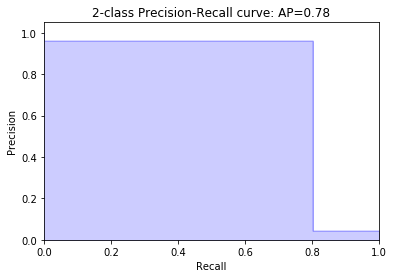

In [65]:
from sklearn.metrics import average_precision_score, precision_recall_curve

# Calculate average precision and the PR curve
average_precision = average_precision_score(y_test, predicted)

# Obtain precision and recall 
precision, recall, _ = precision_recall_curve(y_test, predicted)

# Plot the recall precision tradeoff
plot_pr_curve(recall, precision, average_precision)

### Model adjustments

In [67]:
# Define the model with balanced subsample
model = RandomForestClassifier(class_weight='balanced_subsample', random_state=5, n_estimators = 10)

# Fit your training model to your training set
model.fit(X_train, y_train)

# Obtain the predicted values and probabilities from the model 
predicted = model.predict(X_test)
probs = model.predict_proba(X_test)

# Print the roc_auc_score, the classification report and confusion matrix
print(roc_auc_score(y_test, probs[:, 1]))
print(classification_report(y_test, predicted))
print(confusion_matrix(y_test, predicted))

0.9347962661445273
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      2099
         1.0       0.99      0.79      0.88        91

   micro avg       0.99      0.99      0.99      2190
   macro avg       0.99      0.90      0.94      2190
weighted avg       0.99      0.99      0.99      2190

[[2098    1]
 [  19   72]]


### Adjusting your Random Forest to fraud detection

In [69]:
def get_model_results(X_train, y_train, X_test, y_test, model):
    model.fit(X_train, y_train)
    predicted = model.predict(X_test)
    probs = model.predict_proba(X_test)
    print (classification_report(y_test, predicted))
    print (confusion_matrix(y_test, predicted))

In [70]:
# Change the model options
model = RandomForestClassifier(bootstrap=True, class_weight={0:1, 1:12}, criterion='entropy',
			
			# Change depth of model
            max_depth=10,
		
			# Change the number of samples in leaf nodes
            min_samples_leaf=10, 

			# Change the number of trees to use
            n_estimators=20, n_jobs=-1, random_state=5)

# Run the function get_model_results
get_model_results(X_train, y_train, X_test, y_test, model)

              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      2099
         1.0       0.97      0.85      0.91        91

   micro avg       0.99      0.99      0.99      2190
   macro avg       0.98      0.92      0.95      2190
weighted avg       0.99      0.99      0.99      2190

[[2097    2]
 [  14   77]]


### GridSearchCV to find optimal parameters

In [72]:
from sklearn.model_selection import GridSearchCV
# Define the parameter sets to test
param_grid = {'n_estimators': [1, 30], 'max_features': ['auto', 'log2'],  'max_depth': [4, 8], 'criterion': ['gini', 'entropy']
}

# Define the model to use
model = RandomForestClassifier(random_state=5)

# Combine the parameter sets with the defined model
CV_model = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='recall', n_jobs=-1)

# Fit the model to our training data and obtain best parameters
CV_model.fit(X_train, y_train)
CV_model.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'log2',
 'n_estimators': 30}

### Model results using GridSearchCV

In [74]:
# Input the optimal parameters in the model
model = RandomForestClassifier(class_weight={0:1,1:12}, criterion='gini',
           n_estimators=30, max_depth= 8, max_features = 'log2',  min_samples_leaf=10,  n_jobs=-1, random_state=5)

# Get results from your model
get_model_results(X_train, y_train, X_test, y_test, model)

              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      2099
         1.0       0.95      0.84      0.89        91

   micro avg       0.99      0.99      0.99      2190
   macro avg       0.97      0.92      0.94      2190
weighted avg       0.99      0.99      0.99      2190

[[2095    4]
 [  15   76]]


### Logistic Regression

In [76]:
# Define the Logistic Regression model with weights
model = LogisticRegression(class_weight={0: 1, 1:15}, random_state=5, solver = 'liblinear')

# Get the model results
get_model_results(X_train, y_train, X_test, y_test, model)

              precision    recall  f1-score   support

         0.0       0.99      0.98      0.99      2099
         1.0       0.63      0.88      0.73        91

   micro avg       0.97      0.97      0.97      2190
   macro avg       0.81      0.93      0.86      2190
weighted avg       0.98      0.97      0.98      2190

[[2052   47]
 [  11   80]]


In [81]:
# Import the package
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier

# Define the three classifiers to use in the ensemble
clf1 = LogisticRegression(class_weight={0:1, 1:15}, random_state=5, solver = 'liblinear')
clf2 = RandomForestClassifier(class_weight={0:1, 1:12}, criterion='gini', max_depth=8, max_features='log2',
                              min_samples_leaf=10, n_estimators=30, n_jobs=-1, random_state=5)
clf3 = DecisionTreeClassifier(random_state=5, class_weight="balanced")

# Combine the classifiers in the ensemble model
ensemble_model = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('dt', clf3)], voting='soft')

# Get the results 
get_model_results(X_train, y_train, X_test, y_test, ensemble_model)

              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      2099
         1.0       0.92      0.86      0.89        91

   micro avg       0.99      0.99      0.99      2190
   macro avg       0.96      0.93      0.94      2190
weighted avg       0.99      0.99      0.99      2190

[[2092    7]
 [  13   78]]


### Adjust weights within the Voting Classifier

In [82]:
# Define the ensemble model
ensemble_model = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='soft', weights=[1, 4, 1], flatten_transform=True)

# Get results 
get_model_results(X_train, y_train, X_test, y_test, ensemble_model)

              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      2099
         1.0       0.94      0.85      0.89        91

   micro avg       0.99      0.99      0.99      2190
   macro avg       0.97      0.92      0.94      2190
weighted avg       0.99      0.99      0.99      2190

[[2094    5]
 [  14   77]]


## Fraud detection using unlabelled data

### Exploring your data

In [88]:
df = pd.read_csv("chapter_3/banksim.csv", index_col = 0)

In [89]:
# Get the dataframe shape
df.shape

(7200, 5)

In [90]:
# Display the first 5 rows
df.head()

,age,gender,category,amount,fraud
171915,3,F,es_transportation,49.71,0
426989,4,F,es_health,39.29,0
310539,3,F,es_transportation,18.76,0
215216,4,M,es_transportation,13.95,0
569244,2,M,es_transportation,49.87,0


In [91]:
# Groupby categories and take the mean
print(df.groupby('category').mean())

                           amount     fraud
category                                   
es_barsandrestaurants   43.841793  0.022472
es_contents             55.170000  0.000000
es_fashion              59.780769  0.020619
es_food                 35.216050  0.000000
es_health              126.604704  0.242798
es_home                120.688317  0.208333
es_hotelservices       172.756245  0.548387
es_hyper                46.788180  0.125000
es_leisure             229.757600  1.000000
es_otherservices       149.648960  0.600000
es_sportsandtoys       157.251737  0.657895
es_tech                132.852862  0.179487
es_transportation       27.422014  0.000000
es_travel              231.818656  0.944444
es_wellnessandbeauty    66.167078  0.060606


### Customer segmentation

In [92]:
# Group by age groups and get the mean
print(df.groupby('age').mean())

# Count the values of the observations in each age group
print(df['age'].value_counts())

        amount     fraud
age                     
0    49.468935  0.050000
1    35.622829  0.026648
2    37.228665  0.028718
3    37.279338  0.023283
4    36.197985  0.035966
5    37.547521  0.023990
6    36.700852  0.022293
U    39.117000  0.000000
2    2333
3    1718
4    1279
5     792
1     713
6     314
0      40
U      11
Name: age, dtype: int64


### Using statistics to define normal behavior

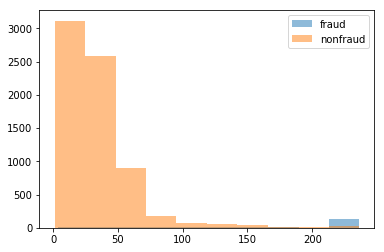

In [93]:
# Create two dataframes with fraud and non-fraud data 
df_fraud = df.loc[df.fraud == 1] 
df_non_fraud = df.loc[df.fraud == 0]

# Plot histograms of the amounts in fraud and non-fraud data 
plt.hist(df_fraud.amount, alpha=0.5, label='fraud')
plt.hist(df_non_fraud.amount, alpha=0.5, label='nonfraud')
plt.legend()
plt.show()

### Scaling the data

In [128]:
def prep_data(df):
    X = df.drop('fraud', axis = 1)
    X = np.array(X).astype(np.float)
    y = df.iloc[:, 2]
    y=np.array(y).astype(np.float)
    return X,y

In [129]:
df = pd.read_csv("chapter_3/banksim_adj.csv", index_col = 0)

# Create X and y from the prep_data function 
X, y = prep_data(df)

In [130]:
# Import the scaler
from sklearn.preprocessing import MinMaxScaler

# Define the scaler and apply to the data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

### K-means clustering

In [132]:
# Import MiniBatchKmeans 
from sklearn.cluster import MiniBatchKMeans

# Define the model 
kmeans = MiniBatchKMeans(n_clusters=8, random_state=0)

# Fit the model to the scaled data
kmeans.fit(X_scaled)

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
        init_size=None, max_iter=100, max_no_improvement=10, n_clusters=8,
        n_init=3, random_state=0, reassignment_ratio=0.01, tol=0.0,
        verbose=0)

### Elbow method

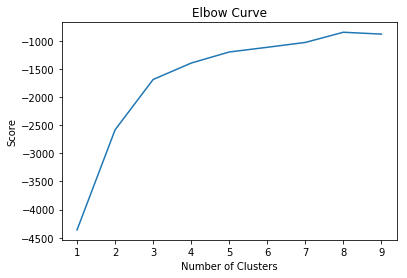

In [133]:
# Define the range of clusters to try
clustno = range(1, 10)

# Run MiniBatch Kmeans over the number of clusters
kmeans = [MiniBatchKMeans(n_clusters=i) for i in clustno]

# Obtain the score for each model
score = [kmeans[i].fit(X_scaled).score(X_scaled) for i in range(len(kmeans))]

# Plot the models and their respective score 
plt.plot(clustno, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

### Detecting outliers

In [135]:
# Split the data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=0)

# Define K-means model 
kmeans = MiniBatchKMeans(n_clusters=3, random_state=42).fit(X_train)

# Obtain predictions and calculate distance from cluster centroid
X_test_clusters = kmeans.predict(X_test)
X_test_clusters_centers = kmeans.cluster_centers_
dist = [np.linalg.norm(x-y) for x, y in zip(X_test, X_test_clusters_centers[X_test_clusters])]

# Create fraud predictions based on outliers on clusters 
km_y_pred = np.array(dist)
km_y_pred[dist >= np.percentile(dist, 95)] = 1
km_y_pred[dist < np.percentile(dist, 95)] = 0

### Checking model results

In [141]:
def plot_confusion_matrix(km_cm):
    df_cm = pd.DataFrame(km_cm, ['True Normal','True Fraud'],['Pred Normal','Pred Fraud'])
    plt.figure(figsize = (8,4))
    sns.set(font_scale=1.4) 
    sns.heatmap(df_cm, annot=True,annot_kws={"size": 16},fmt='g')
    plt.show()

0.8109115999408585


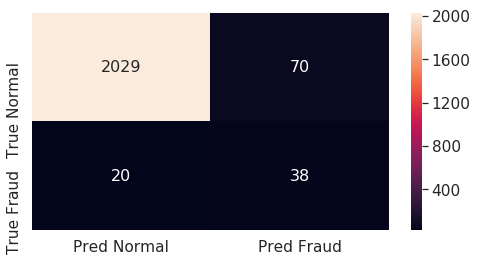

In [142]:
# Obtain the ROC score
print(roc_auc_score(y_test, km_y_pred))

# Create a confusion matrix
km_cm = confusion_matrix(y_test, km_y_pred)

# Plot the confusion matrix in a figure to visualize results 
plot_confusion_matrix(km_cm)

### DB scan

In [149]:
X_scaled = pd.read_pickle('chapter_3/x_scaled.pickle')
X_scaled.shape

(3100, 17)

In [150]:
labels = pd.read_pickle('chapter_3/labels.pickle')
labels.shape

(3100,)

In [152]:
# Import DBSCAN
from sklearn.cluster import DBSCAN
from sklearn.metrics import homogeneity_score, silhouette_score

# Initialize and fit the DBscan model
db = DBSCAN(eps=0.9, min_samples=10, n_jobs=-1).fit(X_scaled)

# Obtain the predicted labels and calculate number of clusters
pred_labels = db.labels_
n_clusters = len(set(pred_labels)) - (1 if -1 in labels else 0)

# Print performance metrics for DBscan
print('Estimated number of clusters: %d' % n_clusters)
print("Homogeneity: %0.3f" % homogeneity_score(labels, pred_labels))
print("Silhouette Coefficient: %0.3f" % silhouette_score(X_scaled, pred_labels))

Estimated number of clusters: 18
Homogeneity: 0.633
Silhouette Coefficient: 0.707


### Assessing smallest clusters

In [156]:
# Count observations in each cluster number
counts = np.bincount(pred_labels[pred_labels>=0])

print(counts)

[1173   23 1400   73   43   52   34   47   55   14   21   17   20   23
   15   11   23]


In [157]:
# Sort the sample counts of the clusters and take the top 3 smallest clusters
smallest_clusters = np.argsort(counts)[:3]

# Print the results 
print("The smallest clusters are clusters:")      
print(smallest_clusters)

The smallest clusters are clusters:
[15  9 14]


In [158]:
# Print the counts of the smallest clusters only
print("Their counts are:")      
print(counts[smallest_clusters])

Their counts are:
[11 14 15]


### Checking results

In [160]:
# Create a dataframe of the predicted cluster numbers and fraud labels 
df = pd.DataFrame({'clusternr':pred_labels,'fraud':labels})

# Create a condition flagging fraud for the smallest clusters 
df['predicted_fraud'] = np.where((df['clusternr'] == 21)|(df['clusternr'] == 17)|(df['clusternr'] == 9),1 , 0)

# Run a crosstab on the results 
print(pd.crosstab(df['fraud'], df['predicted_fraud'], rownames=['Actual Fraud'], colnames=['Flagged Fraud']))

Flagged Fraud     0   1
Actual Fraud           
0              2987  13
1                99   1


## Fraud detection using text

### Word search with dataframes

In [166]:
df = pd.read_csv('chapter_4/enron_emails_clean.csv')
df.columns

Index(['Message-ID', 'From', 'To', 'Date', 'content', 'clean_content'], dtype='object')

In [167]:
df = df.drop('Message-ID', axis = 1)

# Find all cleaned emails that contain 'sell enron stock'
mask = df['clean_content'].str.contains('sell enron stock', na=False)

# Select the data from df using the mask
print(df.loc[mask])

                           From                          To  \
154  ('sarah.palmer@enron.com')  ('sarah.palmer@enron.com')   

                    Date                                            content  \
154  2002-02-01 14:53:35  \nJoint Venture: A 1997 Enron Meeting Belies O...   

                                         clean_content  
154  joint venture enron meeting belies officers cl...  


### Using list of terms

In [169]:
# Create a list of terms to search for
searchfor = ['enron stock', 'sell stock', 'stock bonus', 'sell enron stock']

# Filter cleaned emails on searchfor list and select from df 
filtered_emails = df.loc[df['clean_content'].str.contains('|'.join(searchfor), na=False)]
filtered_emails

,From,To,Date,content,clean_content
0,('advdfeedback@investools.com'),('advdfeedback@investools.com'),2002-01-29 23:20:55,INVESTools Advisory\nA Free Digest of Trusted ...,investools advisory free digest trusted invest...
1,('richard.sanders@enron.com'),('richard.sanders@enron.com'),2000-09-20 19:07:00,----- Forwarded by Richard B Sanders/HOU/ECT o...,forwarded richard b sanders hou ect pm justin ...
2,('m..love@enron.com'),('m..love@enron.com'),2001-10-30 16:15:17,hey you are not wearing your target purple shi...,hey wearing target purple shirt today mine wan...
3,('leslie.milosevich@kp.org'),('leslie.milosevich@kp.org'),2002-01-30 17:54:18,Leslie Milosevich\n1042 Santa Clara Avenue\nAl...,leslie milosevich santa clara avenue alameda c...
4,('rtwait@graphicaljazz.com'),('rtwait@graphicaljazz.com'),2002-01-30 19:36:01,"Rini Twait\n1010 E 5th Ave\nLongmont, CO 80501...",rini twait e th ave longmont co rtwait graphic...
5,('guelaguetza@club.lemonde.fr'),('guelaguetza@club.lemonde.fr'),2002-01-30 17:48:06,"Laurent Meillier\n1540 Jackson Stq\nOakland, C...",laurent meillier jackson stq oakland ca guelag...
6,('jlangham@kern-search.com'),('jlangham@kern-search.com'),2001-11-14 00:10:46,"Dear Mr. Whalley,\n\nI hope that you will take...",dear mr whalley hope take time read content me...
7,('jnissl@healthwise.org'),('jnissl@healthwise.org'),2002-01-30 17:45:13,"Jan Nissl\n1115 E. State\nBoise, ID 83712\njni...",jan nissl e state boise id jnissl healthwise o...
8,('m..love@enron.com'),('m..love@enron.com'),2001-10-30 16:05:30,"2-5, so much for the nice machine\n\n\n -----O...",much nice machine original message baumbach da...
9,('robearin@yahoo.com'),('robearin@yahoo.com'),2002-01-30 17:48:01,"Leigh Clemons\n355 Seyburn Drive\nBaton Rouge,...",leigh clemons seyburn drive baton rouge la rob...


### Creating a flag

In [170]:
# Create flag variable where the emails match the searchfor terms
df['flag'] = np.where((df['clean_content'].str.contains('|'.join(searchfor)) == True), 1, 0)

# Count the values of the flag variable
count = df['flag'].value_counts()
print(count)

0    1776
1     314
Name: flag, dtype: int64


### Removing stopwords

In [173]:
# Import nltk packages and string 
from nltk.corpus import stopwords
import string

# Define stopwords to exclude
stop = set(stopwords.words('english'))
stop.update(("to","cc","subject","http","from","sent", "ect", "u", "fwd", "www", "com"))

# Define punctuations to exclude and lemmatizer
exclude = set(string.punctuation)

### Cleaning text data

In [208]:
cleantext = pd.read_csv('chapter_4/cleantext.csv', header = None)
cleantext[0]

0    yeah freak totally acted like best friend some...
1    notice may nymex division members member firms...
2    mary baker juniper st escondido ca msmlbaker h...
3    start date hourahead hour ancillary schedules ...
4    wgolemboski nyiso com writes nyiso tech exchan...
Name: 0, dtype: object

In [209]:
# Import the lemmatizer from nltk
from nltk.stem.wordnet import WordNetLemmatizer
lemma = WordNetLemmatizer()

# Define word cleaning function
def clean(text, stop):
    text = text.rstrip()
    stop_free = " ".join([i for i in text.lower().split() if((i not in stop) and (not i.isdigit()))])
    punc_free = ''.join(i for i in stop_free if i not in exclude)
    normalized = " ".join(lemma.lemmatize(i) for i in punc_free.split())      
    return normalized

# Clean the emails in df and print results
text_clean=[]
for text in cleantext[0]:
    text_clean.append(clean(text, stop).split())    
print(text_clean)

[['yeah', 'freak', 'totally', 'acted', 'like', 'best', 'friend', 'something', 'give', 'break', 'someone', 'would', 'totally', 'went', 'actually', 'watch', 'game', 'osu', 'game', 'went', 'peacock', 'drank', 'beer', 'carter', 'owns', 'partied', 'morning', 'went', 'game', 'bunch', 'u', 'went', 'eugene', 'partied', 'stayed', 'night', 'wilson', 'cindys', 'deidre', 'stephan', 'really', 'fun', 'sunday', 'sucked', 'cause', 'really', 'hung', 'portland', 'noon', 'play', 'golf', 'kim', 'beer', 'course', 'felt', 'great', 'speaking', 'picking', 'chick', 'amanda', 'told', 'pretty', 'interesting', 'story', 'last', 'week', 'trying', 'pick', 'couple', 'time', 'let', 'see', 'friend', 'male', 'female', 'try', 'pick', 'dating', 'frankly', 'embarassed', 'told', 'nice', 'katie', 'good', 'thing', 'dave', 'good', 'sport', 'see', 'article', 'capital', 'consultant', 'grayson', 'lucky', 'wearing', 'set', 'cement', 'sneaker', 'bottom', 'willamete', 'screwing', 'around', 'union', 'money', 'like', 'bad', 'dont', 'h

### Create dictionary and corpus

In [210]:
# Import the packages
import gensim
from gensim import corpora

# Define the dictionary
dictionary = corpora.Dictionary(text_clean)

# Define the corpus 
corpus = [dictionary.doc2bow(text) for text in text_clean]

# Print corpus and dictionary
print(corpus)
print(dictionary)

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 2), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 2), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 3), (35, 1), (36, 3), (37, 1), (38, 1), (39, 2), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 2), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 2), (62, 1), (63, 2), (64, 1), (65, 1), (66, 1), (67, 1), (68, 2), (69, 1), (70, 2), (71, 1), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1), (78, 1), (79, 1), (80, 1), (81, 1), (82, 1), (83, 1), (84, 2), (85, 2), (86, 1), (87, 1), (88, 1), (89, 1), (90, 1), (91, 1), (92, 1), (93, 1), (94, 4), (95, 1), (96, 1), (97, 1), (98, 1)], [(93, 3), (97, 2), (99, 1), (100, 1), (101, 2), (102, 1), (103, 1), (104, 1), (105, 1), (106, 2), (107, 2), (108, 1)

### LDA model

In [211]:
# Define the LDA model
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=5)

# Save the topics and top 5 words
topics = ldamodel.print_topics(num_words=5)

# Print the results
for topic in topics:
    print(topic)

(0, '0.019*"went" + 0.015*"nyiso" + 0.015*"friend" + 0.015*"game" + 0.010*"april"')
(1, '0.006*"post" + 0.005*"close" + 0.005*"session" + 0.005*"month" + 0.005*"contract"')
(2, '0.040*"close" + 0.033*"trading" + 0.033*"session" + 0.033*"post" + 0.029*"month"')
(3, '0.038*"enron" + 0.027*"employee" + 0.022*"company" + 0.022*"million" + 0.017*"made"')
(4, '0.025*"schedule" + 0.014*"california" + 0.014*"portland" + 0.014*"date" + 0.014*"hour"')


### Finding fraudsters based on topic

In [213]:
def get_topic_details(ldamodel, corpus):
    topic_details_df = pd.DataFrame()
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                topic_details_df = topic_details_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
    topic_details_df.columns = ['Dominant_Topic', '% Score', 'Topic_Keywords']
    return topic_details_df

In [214]:
# Run get_topic_details function and check the results
print(get_topic_details(ldamodel, corpus))

   Dominant_Topic  % Score                                     Topic_Keywords
0             0.0   0.9932  went, nyiso, friend, game, april, time, market...
1             2.0   0.9962  close, trading, session, post, month, contract...
2             3.0   0.9934  enron, employee, company, million, made, consu...
3             4.0   0.9636  schedule, california, portland, date, hour, is...
4             0.0   0.9771  went, nyiso, friend, game, april, time, market...


In [216]:
# Add original text to topic details in a dataframe
contents = pd.DataFrame({'Original text': text_clean})
topic_details = pd.concat([get_topic_details(ldamodel, corpus), contents], axis= 1)
topic_details.head()

,Dominant_Topic,% Score,Topic_Keywords,Original text
0,0.0,0.9932,"went, nyiso, friend, game, april, time, market...","[yeah, freak, totally, acted, like, best, frie..."
1,2.0,0.9962,"close, trading, session, post, month, contract...","[notice, may, nymex, division, member, member,..."
2,3.0,0.9934,"enron, employee, company, million, made, consu...","[mary, baker, juniper, st, escondido, ca, msml..."
3,4.0,0.9636,"schedule, california, portland, date, hour, is...","[start, date, hourahead, hour, ancillary, sche..."
4,0.0,0.9771,"went, nyiso, friend, game, april, time, market...","[wgolemboski, nyiso, writes, nyiso, tech, exch..."


In [218]:
# Add original text to topic details in a dataframe
contents = pd.DataFrame({'Original text':text_clean})
topic_details = pd.concat([get_topic_details(ldamodel, corpus), contents], axis=1)

# Create flag for text highest associated with topic 3
topic_details['flag'] = np.where((topic_details['Dominant_Topic'] == 3.0), 1, 0)
topic_details.head()

,Dominant_Topic,% Score,Topic_Keywords,Original text,flag
0,0.0,0.9932,"went, nyiso, friend, game, april, time, market...","[yeah, freak, totally, acted, like, best, frie...",0
1,2.0,0.9962,"close, trading, session, post, month, contract...","[notice, may, nymex, division, member, member,...",0
2,3.0,0.9934,"enron, employee, company, million, made, consu...","[mary, baker, juniper, st, escondido, ca, msml...",1
3,4.0,0.9636,"schedule, california, portland, date, hour, is...","[start, date, hourahead, hour, ancillary, sche...",0
4,0.0,0.9771,"went, nyiso, friend, game, april, time, market...","[wgolemboski, nyiso, writes, nyiso, tech, exch...",0
